# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

from pprint import pprint

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


625

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
base_url = 'http://api.openweathermap.org/data/2.5/weather?q='
units = 'imperial'

# remove newline chars in city list
new_cities = map(lambda s: s.strip(), cities)

# initialize list to store data on each city
all_cities_data = []

print('Beginning Data Retrieval')
print('-----------------------------')

i=1
for city in new_cities:
    url = f'{base_url}{city}&appid={api_key}&units={units}'
    response = requests.get(url).json()

    try:
        print(f'Processing Record {i} of {len(cities)} | {city}')

        # create dictionary for each city data
        city_data = {
            'City' : response['name'],
            'Cloudiness' : response['clouds']['all'],
            'Country' : response['sys']['country'],
            'Date' : response['dt'],
            'Humidity' : response['main']['humidity'],
            'Lat' : response['coord']['lat'],
            'Lng' : response['coord']['lon'],
            'Max Temp' : response['main']['temp_max'],
            'Wind Speed' : response['wind']['speed']
        }

        # add to list of cities
        all_cities_data.append(city_data)
        i+=1

    # if city not found, skip city
    except KeyError:
        print("City not found. Skipping...")
        i+=1

print('-----------------------------')
print('Data Retrieval Complete')
print('-----------------------------')
print(f'Found Cities: {len(all_cities_data)}')


Beginning Data Retrieval
-----------------------------
Processing Record 1 of 625 | faanui
Processing Record 2 of 625 | busselton
Processing Record 3 of 625 | torbay
Processing Record 4 of 625 | salinas
Processing Record 5 of 625 | illoqqortoormiut
City not found. Skipping...
Processing Record 6 of 625 | yugorsk
Processing Record 7 of 625 | yashkul
Processing Record 8 of 625 | lorengau
Processing Record 9 of 625 | guiyang
Processing Record 10 of 625 | mahebourg
Processing Record 11 of 625 | belushya guba
City not found. Skipping...
Processing Record 12 of 625 | zevio
Processing Record 13 of 625 | rikitea
Processing Record 14 of 625 | bredasdorp
Processing Record 15 of 625 | new norfolk
Processing Record 16 of 625 | geraldton
Processing Record 17 of 625 | yerbogachen
Processing Record 18 of 625 | dingle
Processing Record 19 of 625 | ushuaia
Processing Record 20 of 625 | hithadhoo
Processing Record 21 of 625 | mar del plata
Processing Record 22 of 625 | kodiak
Processing Record 23 of 625

Processing Record 198 of 625 | axim
Processing Record 199 of 625 | akonolinga
Processing Record 200 of 625 | hobyo
Processing Record 201 of 625 | gemena
Processing Record 202 of 625 | sena madureira
Processing Record 203 of 625 | oppdal
Processing Record 204 of 625 | nantucket
Processing Record 205 of 625 | port hardy
Processing Record 206 of 625 | mizan teferi
Processing Record 207 of 625 | katangli
Processing Record 208 of 625 | general pico
Processing Record 209 of 625 | pujili
Processing Record 210 of 625 | teya
Processing Record 211 of 625 | sioux lookout
Processing Record 212 of 625 | sambava
Processing Record 213 of 625 | havoysund
Processing Record 214 of 625 | rio gallegos
Processing Record 215 of 625 | chuy
Processing Record 216 of 625 | iskateley
Processing Record 217 of 625 | magui
City not found. Skipping...
Processing Record 218 of 625 | liverpool
Processing Record 219 of 625 | talnakh
Processing Record 220 of 625 | russell
Processing Record 221 of 625 | kumluca
Processin

Processing Record 388 of 625 | santa maria
Processing Record 389 of 625 | pemangkat
City not found. Skipping...
Processing Record 390 of 625 | raudeberg
Processing Record 391 of 625 | zlatoustovsk
City not found. Skipping...
Processing Record 392 of 625 | labuhan
Processing Record 393 of 625 | penjamillo
City not found. Skipping...
Processing Record 394 of 625 | barra
Processing Record 395 of 625 | oussouye
Processing Record 396 of 625 | rapid valley
Processing Record 397 of 625 | taltal
Processing Record 398 of 625 | sorland
Processing Record 399 of 625 | mackenzie
Processing Record 400 of 625 | ilulissat
Processing Record 401 of 625 | bangangte
Processing Record 402 of 625 | pipraich
Processing Record 403 of 625 | halalo
City not found. Skipping...
Processing Record 404 of 625 | kungurtug
Processing Record 405 of 625 | rorvik
Processing Record 406 of 625 | terrace
Processing Record 407 of 625 | donji milanovac
Processing Record 408 of 625 | zverinogolovskoye
Processing Record 409 of 

Processing Record 577 of 625 | marzuq
Processing Record 578 of 625 | high level
Processing Record 579 of 625 | laplace
Processing Record 580 of 625 | puerto ayacucho
Processing Record 581 of 625 | norheimsund
Processing Record 582 of 625 | ramapuram
Processing Record 583 of 625 | zelenoborsk
Processing Record 584 of 625 | buin
Processing Record 585 of 625 | parainen
City not found. Skipping...
Processing Record 586 of 625 | teacapan
Processing Record 587 of 625 | burnie
Processing Record 588 of 625 | shache
Processing Record 589 of 625 | uaua
Processing Record 590 of 625 | khirkiya
Processing Record 591 of 625 | bodden town
Processing Record 592 of 625 | belaya gora
Processing Record 593 of 625 | kismayo
City not found. Skipping...
Processing Record 594 of 625 | mapiripan
Processing Record 595 of 625 | nikko
Processing Record 596 of 625 | puerto escondido
Processing Record 597 of 625 | sobolevo
Processing Record 598 of 625 | bondoukou
Processing Record 599 of 625 | sartell
Processing R

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# convert list into DataFrame
city_data_df = pd.DataFrame(all_cities_data)

# save city data to csv
city_data_df.to_csv(output_data_file)

# preview data
city_data_df.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Faanui,31,PF,1569891949,78,-16.48,-151.75,77.99,18.50
1,Busselton,57,AU,1569891956,54,-33.64,115.35,63.00,7.18
2,Torbay,90,CA,1569892026,93,47.66,-52.73,45.00,23.04
3,Salinas,0,US,1569891852,39,36.67,-121.66,66.99,12.75
4,Yugorsk,70,RU,1569892089,89,61.32,63.33,34.48,7.90


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

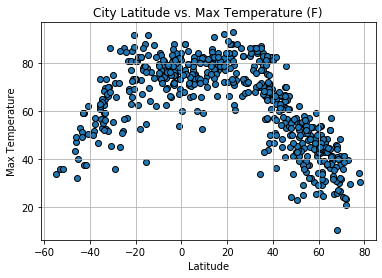

In [5]:
# create plot
fig, ax = plt.subplots()

# plot points
ax.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolor='k')

# set title and x,y labels
plt.title('City Latitude vs. Max Temperature (F)')
ax.set_xlabel("Latitude")
ax.set_ylabel('Max Temperature')

# set grid
plt.grid()

# show figure
plt.show()


#### Latitude vs. Humidity Plot

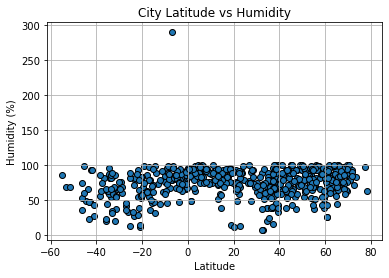

In [6]:
# create plot
fig, ax = plt.subplots()

# plot points
ax.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolor='k')

# set title and x, y labels
plt.title('City Latitude vs Humidity')
ax.set_xlabel('Latitude')
ax.set_ylabel('Humidity (%)')

# set grid
plt.grid()

# show figure
plt.show()


#### Latitude vs. Cloudiness Plot

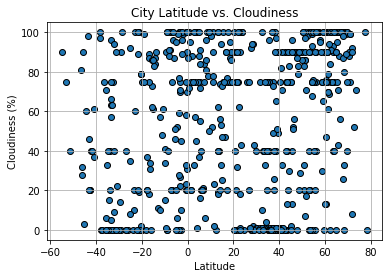

In [7]:
# create figure
fig, ax = plt.subplots()

# plot points
ax.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolor='k')

# set title and x, y labels
plt.title('City Latitude vs. Cloudiness')
ax.set_xlabel('Latitude')
ax.set_ylabel('Cloudiness (%)')

# set grid
plt.grid()

# show figure
plt.show()


#### Latitude vs. Wind Speed Plot

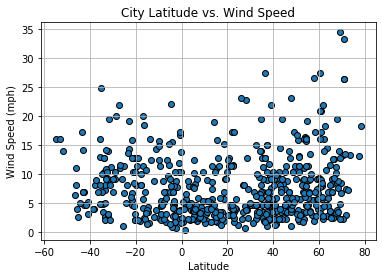

In [8]:
# create figure
fig, ax = plt.subplots()

# plot points
ax.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolor='k')

# set title and x, y labels
plt.title('City Latitude vs. Wind Speed')
ax.set_xlabel('Latitude')
ax.set_ylabel('Wind Speed (mph)')

# set grid
plt.grid()

# show figure
plt.show()


## Observations

As we look at cities closer to the equator, we see that those cities tend to have a higher max temperature and more humidity. There also tends to be lower wind speeds which the lack of cooling would contribute to there being more heat.